neuralprophet installation is required : !pip install neuralprophet

In [ ]:
from neuralprophet import NeuralProphet, set_log_level
#set_log_level("ERROR")

import pandas as pd
import urllib #package required to interact with live webpage 
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots 

In [ ]:
url = "https://services.swpc.noaa.gov/json/goes/primary/xrays-7-day.json"

response = urllib.request.urlopen(url)

data = json.loads(response.read())

In [ ]:
df16 = pd.DataFrame.from_dict(data)

df16 = df16[df16.energy != '0.05-0.4nm']
df16.drop(['satellite','observed_flux', 'electron_correction', 'electron_contaminaton','energy'], inplace=True, axis=1)
df16.columns =['time_tag','y']

In [ ]:
df16['time_tag']=pd.to_datetime(df16['time_tag'])
 
df16['ds'] =df16['time_tag'].dt.strftime('%Y-%m-%d %H:%M:%S')
df16['ds']=pd.to_datetime(df16['ds'])
df16.drop(['time_tag'], inplace=True, axis=1)


df16['ds'].head()

1   2022-06-29 21:05:00
3   2022-06-29 21:06:00
5   2022-06-29 21:07:00
7   2022-06-29 21:08:00
9   2022-06-29 21:09:00
Name: ds, dtype: datetime64[ns]

In [ ]:

df16

,y,ds
1,2.397688e-07,2022-06-29 03:34:00
3,2.416834e-07,2022-06-29 03:35:00
5,2.421831e-07,2022-06-29 03:36:00
7,2.410635e-07,2022-06-29 03:37:00
9,2.356426e-07,2022-06-29 03:38:00
...,...,...
20147,4.848255e-07,2022-07-06 03:27:00
20149,4.853683e-07,2022-07-06 03:28:00
20151,4.846212e-07,2022-07-06 03:29:00
20153,4.880111e-07,2022-07-06 03:30:00


In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10077 entries, 1 to 20153
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       10077 non-null  float64       
 1   ds      10077 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 236.2 KB


In [ ]:
# Autoregression - Next step forecast
m = NeuralProphet(
    n_lags=50,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
    yearly_seasonality=False,
    daily_seasonality=False
)
metrics = m.fit(df16)# freq='1min')

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 103


  0%|          | 0/150 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.55E-02, min: 5.91E-03


  0%|          | 0/150 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.55E-02, min: 6.80E-03
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.70E-02
Epoch[103/103]: 100%|██████████| 103/103 [00:47<00:00,  2.18it/s, SmoothL1Loss=0.000542, MAE=6.69e-9, RMSE=1.97e-8, RegLoss=0]


In [ ]:
#future = m.make_future_dataframe(df16, periods=60, n_historic_predictions=True)
#forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - T
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - T


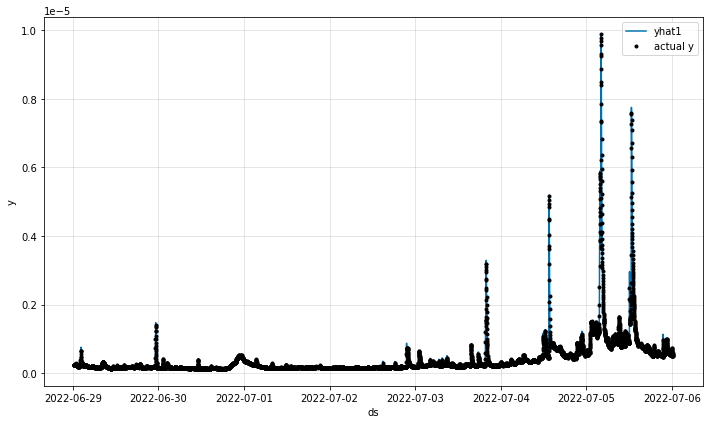

In [ ]:
# Forecasting the very next minute
forecast = m.predict(df16)
fig = m.plot(forecast)

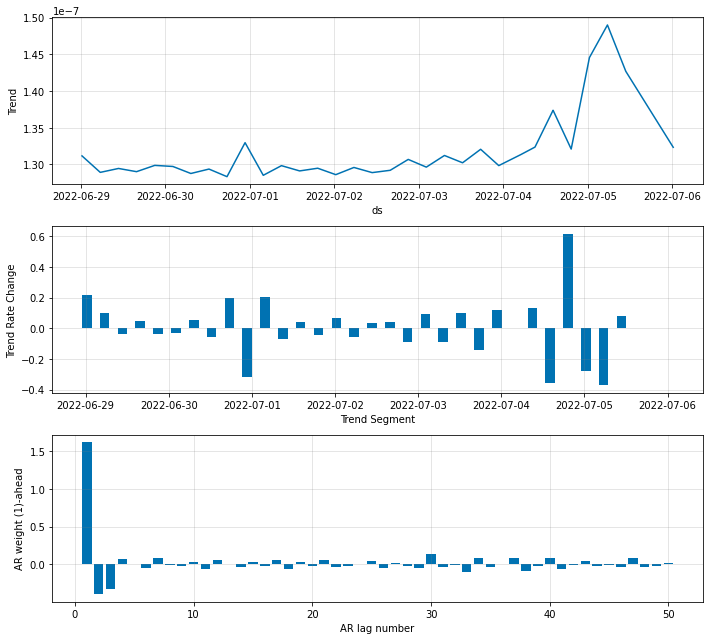

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(1) # temporary workaround to plot actual AR weights
fig_param = m.plot_parameters()

The ‘AR weight’ plot shows that the most recent observations are given significantly more weight compared to more distant observations.

### Multi-step forecast

In [ ]:
# Autoregression - Next step forecast
m = NeuralProphet(
    n_lags = 50,
    n_forecasts = 20,
    changepoints_range = 0.95,
    n_changepoints = 30,
    weekly_seasonality=False,
    yearly_seasonality=False,
    daily_seasonality=False
)
metrics = m.fit(df16)# freq='1min')

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 103


  0%|          | 0/150 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.91E-01, min: 5.15E-03


  0%|          | 0/150 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.91E-01, min: 6.80E-03
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.54E-01
Epoch[103/103]: 100%|██████████| 103/103 [00:48<00:00,  2.11it/s, SmoothL1Loss=0.0245, MAE=6.32e-8, RMSE=2.44e-7, RegLoss=0]


INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - T
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - T
WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


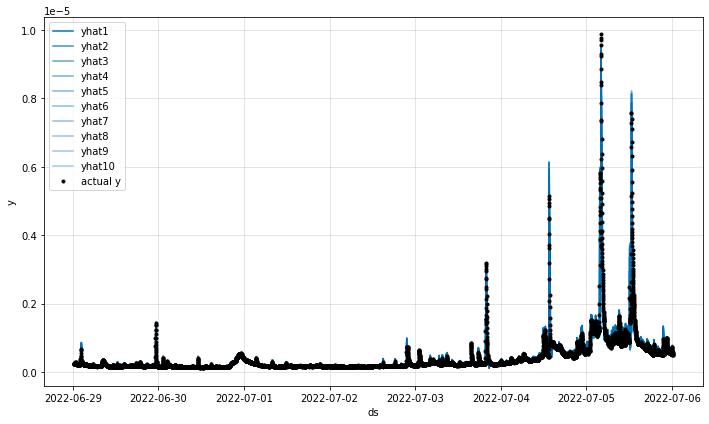

In [ ]:
forecast = m.predict(df16)
fig = m.plot(forecast)

WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


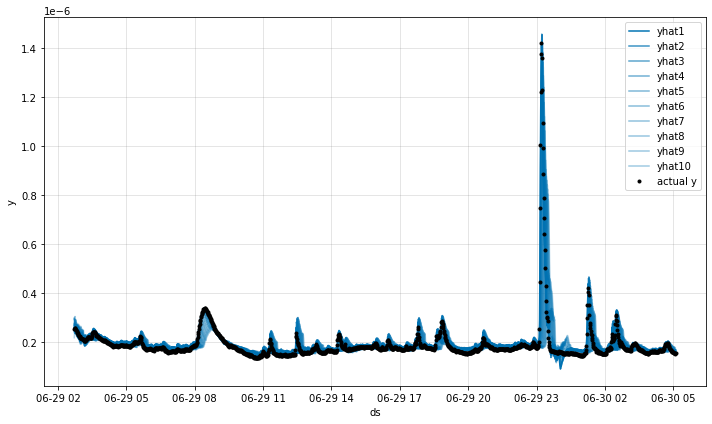

In [ ]:
fig = m.plot(forecast[144:6*288])

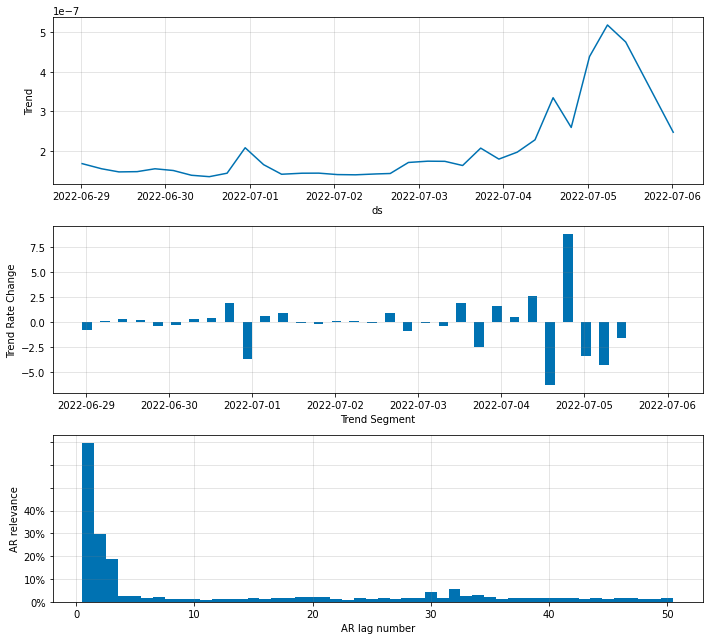

In [ ]:
fig_param = m.plot_parameters()

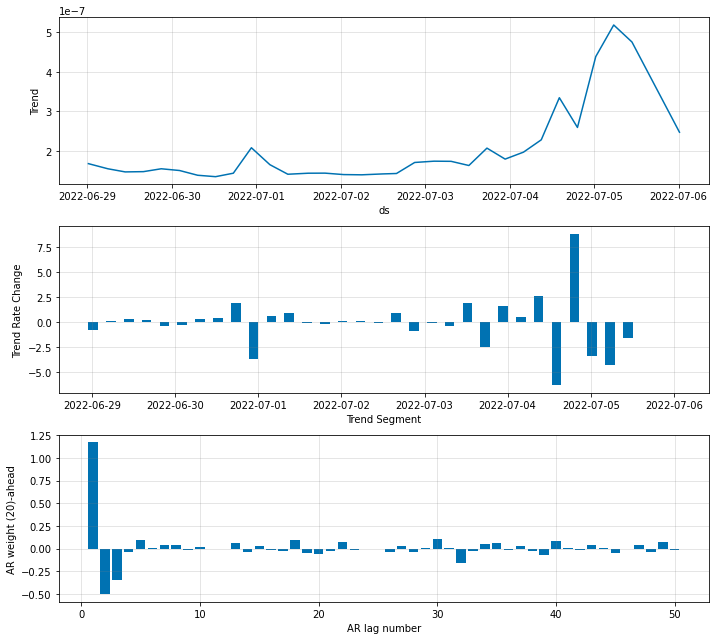

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(20)
fig_param = m.plot_parameters()

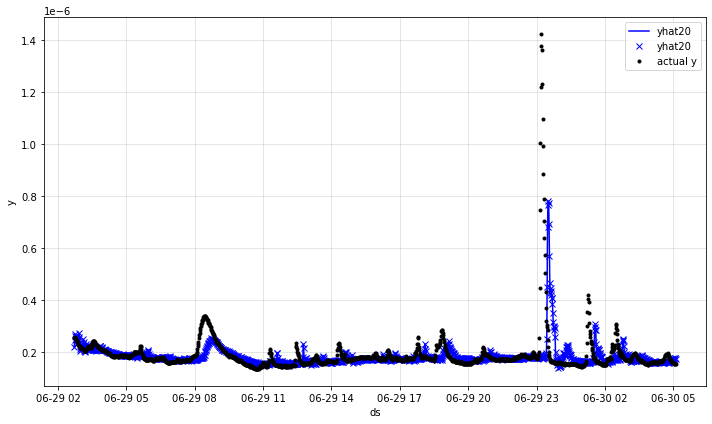

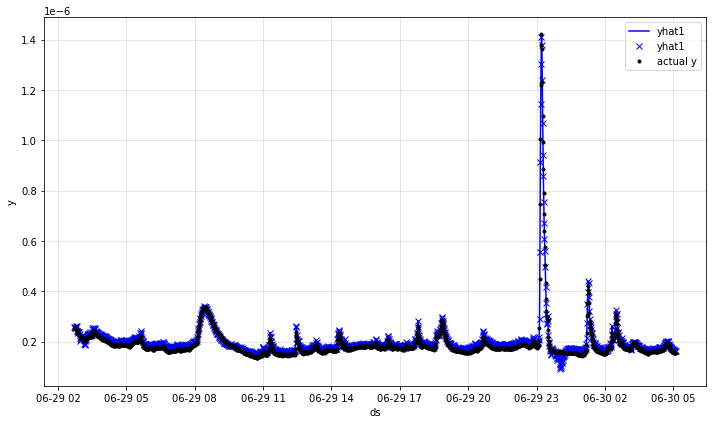

In [ ]:
fig = m.plot(forecast[144:6*288])
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[144:6*288])

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - T
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 98.78% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - T
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 98.78% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - T


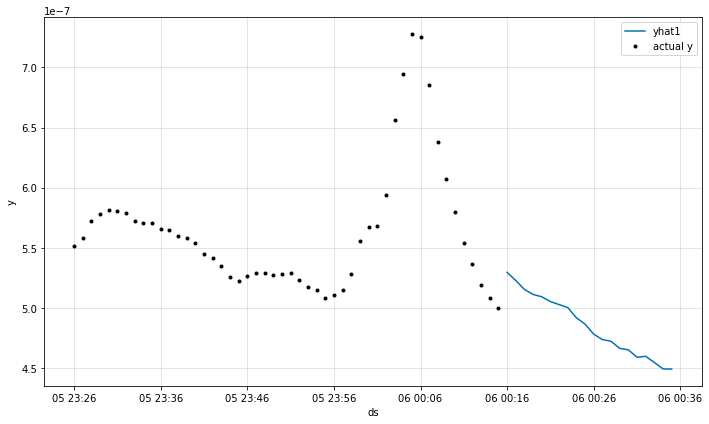

In [ ]:
future = m.make_future_dataframe(df16, n_historic_predictions=12)
forecast = m.predict(future)
m = m.highlight_nth_step_ahead_of_each_forecast(None) # reset highlight
fig = m.plot_last_forecast(forecast)

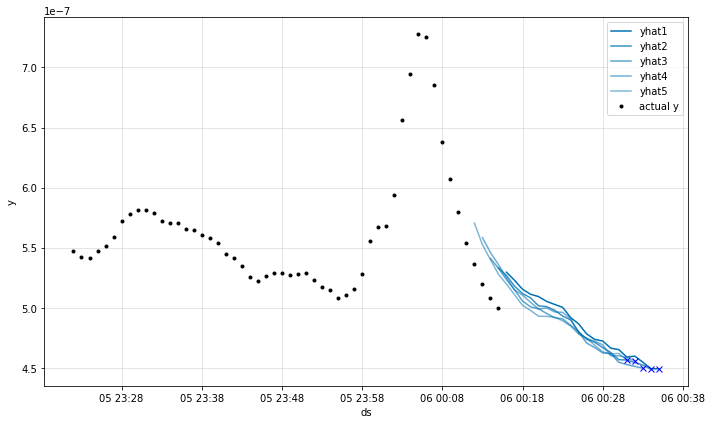

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(20)
fig = m.plot_last_forecast(forecast, include_previous_forecasts=4)

In [ ]:
### Downsampling 

df16.loc[:, "ds"] = pd.to_datetime(df16.loc[:, "ds"])
df_3min = df16.set_index('ds', drop=False).resample('10T').mean().reset_index()
len(df_3min)

1009

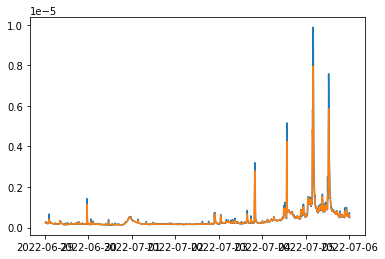

In [ ]:
plt.plot(df16['ds'],df16['y'])
plt.plot(df_3min['ds'],df_3min['y'])

In [ ]:
df_3min.head()

,ds,y
0,2022-06-29 00:10:00,2.443870e-07
1,2022-06-29 00:20:00,2.433732e-07
2,2022-06-29 00:30:00,2.391679e-07
3,2022-06-29 00:40:00,2.701019e-07
4,2022-06-29 00:50:00,2.444256e-07


In [ ]:
m = NeuralProphet(
    n_lags=24,
    n_forecasts=24,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
    yearly_seasonality=False,
    daily_seasonality=False
)
metrics = m.fit(df_3min)

INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.901% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 10T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 196


  0%|          | 0/125 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.81E+00, min: 3.88E-02


  0%|          | 0/125 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.81E+00, min: 3.88E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.90E-01
Epoch[196/196]: 100%|██████████| 196/196 [00:28<00:00,  6.89it/s, SmoothL1Loss=0.0483, MAE=1.05e-7, RMSE=3.61e-7, RegLoss=0]


INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.901% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.903% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


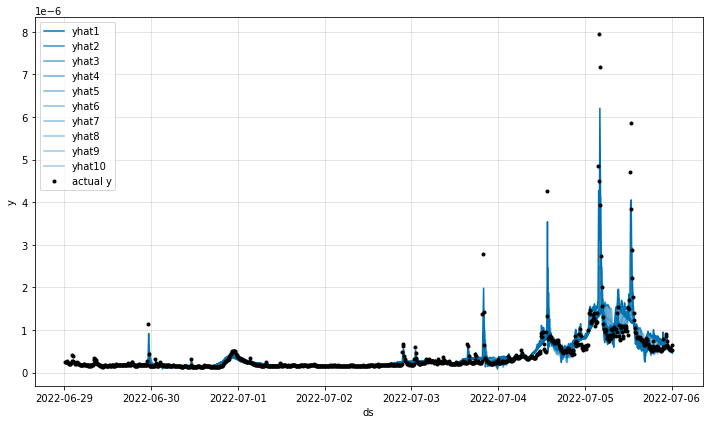

In [ ]:
forecast = m.predict(df_3min)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 99.901% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 97.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
INFO - (NP.df_utils._infer_frequency) - Major frequency 10T corresponds to 97.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 10T
WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


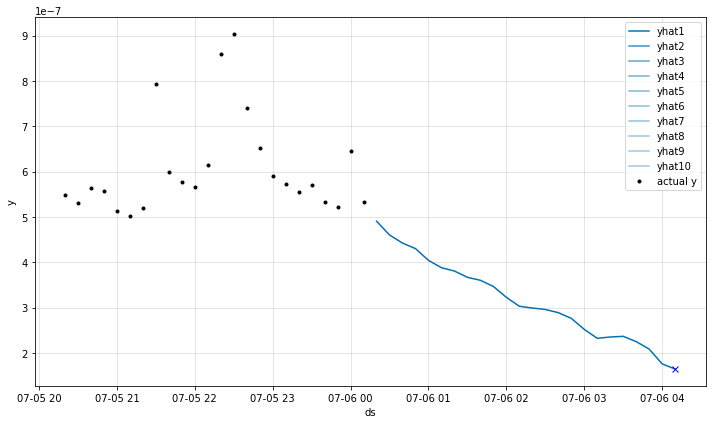

In [ ]:
future = m.make_future_dataframe(df_3min)
forecast = m.predict(future)
m = m.highlight_nth_step_ahead_of_each_forecast(24)
fig = m.plot_last_forecast(forecast, include_previous_forecasts=10)

m = NeuralProphet(
    changepoints_range=0.95,
    n_changepoints=50,
    trend_reg=1,
    weekly_seasonality=False,
    daily_seasonality=10,
)
metrics = m.fit(df16, freq='1min')
future = m.make_future_dataframe(df16, periods=20, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)
##### fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

In [ ]:
m = NeuralProphet(learning_rate=0.01)
df_train, df_test = m.split_df(df16, freq='1min', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='1min', validation_df=df_test, progress='plot')

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 105
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pi

In [ ]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
104,0.047648,1.144394e-07,2.794744e-07,0.0,0.533495,8.203561e-07,0.000001


INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min


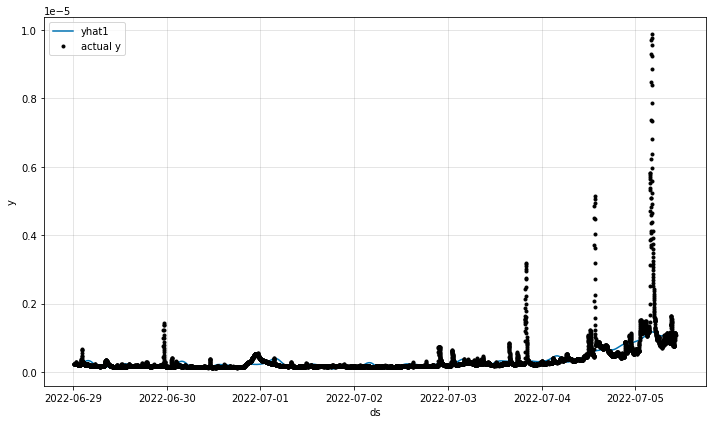

In [ ]:
forecast = m.predict(df_train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.881% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.881% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min


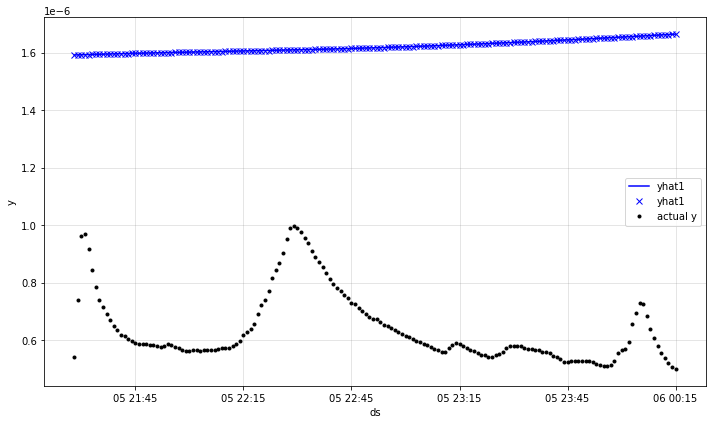

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

### MEJOR 1-step ahead forecast with Auto-Regression

In [ ]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    ar_reg=1,
    learning_rate = 0.01,
)
df_train, df_test = m.split_df(df16, freq='1min', valid_p = 1.0/12)

#metrics = m.fit(df_train, freq='1min', validation_df=df_test, progress='plot')
metrics = m.fit(df_train, freq='1min', validation_df=df_test, progress='plot-all')

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 105
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 1829, in _train
    from livelossplot import PlotLosses
Modul

In [ ]:
len(df_train)
#len(df_test)

9244

In [ ]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
104,0.000558,7.059946e-09,1.743034e-08,0.002598,0.005284,2.265543e-08,9.013750e-08


INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min


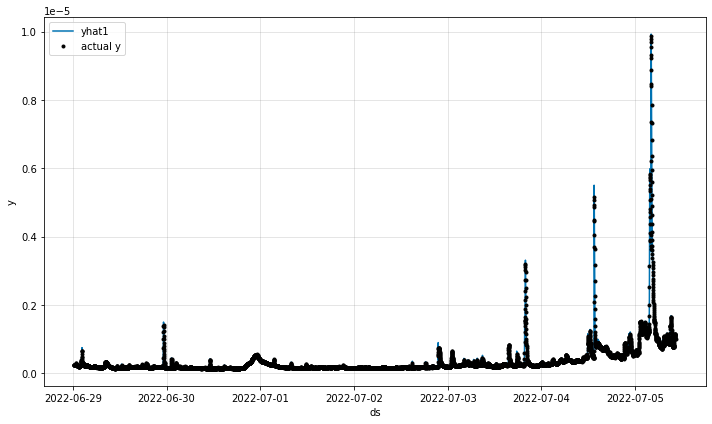

In [ ]:
forecast = m.predict(df_train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.89% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.89% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min


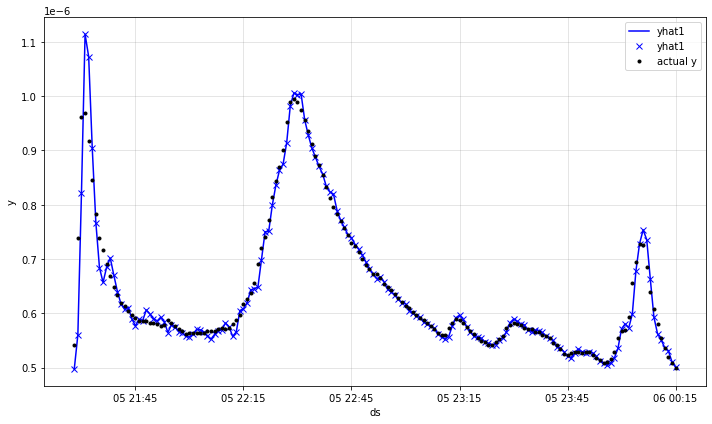

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

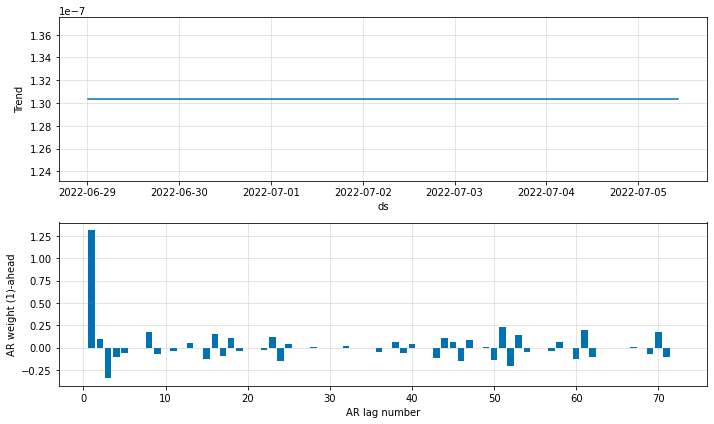

In [ ]:
fig_param = m.plot_parameters()

### 1-step ahead forecast with AR-Net: Using a Neural Network

In [ ]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    num_hidden_layers=4,
    d_hidden=32,
    learning_rate=0.003,
)
df_train, df_test = m.split_df(df16, freq='1min', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='1min', validation_df=df_test, progress='plot')

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 105
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 1829, in _train
    from livelossplot import PlotLosses
Modul

In [ ]:
forecast

,ds,y,yhat1,residual1,ar1,trend
0,2022-06-29 00:31:00,2.370971e-07,None,None,None,None
1,2022-06-29 00:32:00,2.405606e-07,None,None,None,None
2,2022-06-29 00:33:00,2.397619e-07,None,None,None,None
3,2022-06-29 00:34:00,2.377205e-07,None,None,None,None
4,2022-06-29 00:35:00,2.401860e-07,None,None,None,None
...,...,...,...,...,...,...
9239,2022-07-05 10:30:00,8.866587e-07,0.000001,-0.0,0.000001,-0.0
9240,2022-07-05 10:31:00,8.727177e-07,0.000001,0.0,0.000001,-0.0
9241,2022-07-05 10:32:00,8.664253e-07,0.000001,-0.0,0.000001,-0.0
9242,2022-07-05 10:33:00,8.571493e-07,0.000001,-0.0,0.000001,-0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min


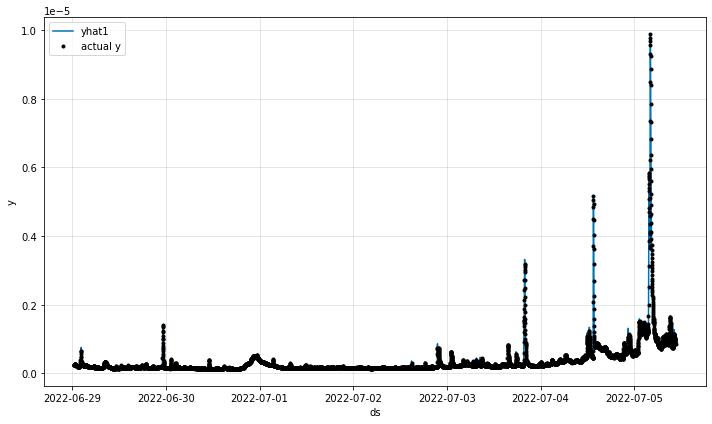

In [ ]:

forecast = m.predict(df_train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.89% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.89% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min


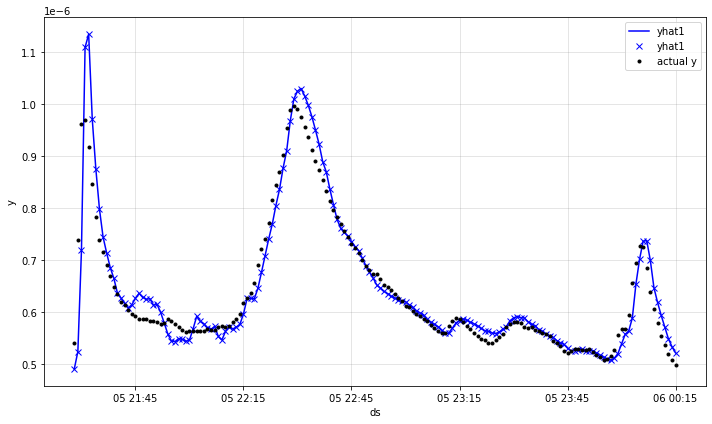

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

In [ ]:
forecast["yhat1"].iloc[-1]

5.220036882747081e-07

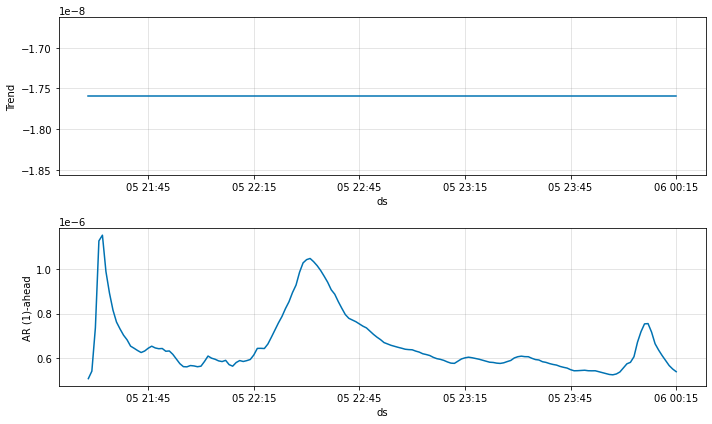

In [ ]:
fig_comp = m.plot_components(forecast[-7*24:])

In [ ]:
forecast

,ds,y,yhat1,residual1,ar1,trend
0,2022-06-29 00:31:00,2.370971e-07,None,NaN,None,None
1,2022-06-29 00:32:00,2.405606e-07,None,NaN,None,None
2,2022-06-29 00:33:00,2.397619e-07,None,NaN,None,None
3,2022-06-29 00:34:00,2.377205e-07,None,NaN,None,None
4,2022-06-29 00:35:00,2.401860e-07,None,NaN,None,None
...,...,...,...,...,...,...
10072,2022-07-06 00:23:00,4.623190e-07,0.0,0.0,0.000001,-0.0
10073,2022-07-06 00:24:00,4.597831e-07,0.0,0.0,0.0,-0.0
10074,2022-07-06 00:25:00,4.557816e-07,0.0,0.0,0.0,-0.0
10075,2022-07-06 00:26:00,4.550822e-07,0.0,0.0,0.0,-0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min


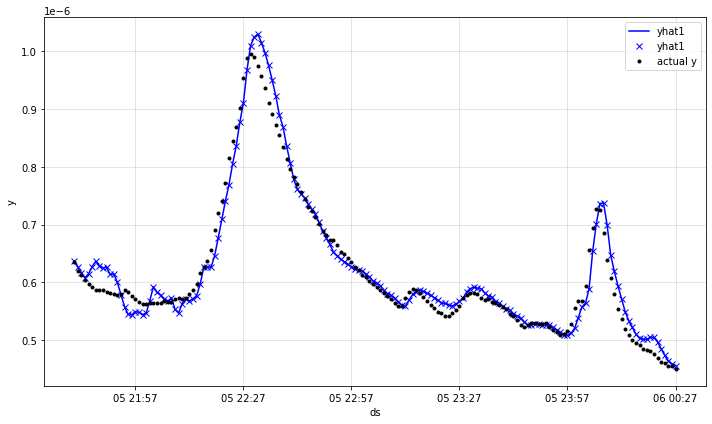

In [ ]:
forecast = m.predict(df16)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

# 4 and 30 steps ahead

In [ ]:
m4 = NeuralProphet(
    growth='off',
    n_forecasts=4,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    num_hidden_layers=4,
    d_hidden=32,
    learning_rate=0.003,
)
df_train, df_test = m.split_df(df16, freq='1min', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='1min', validation_df=df_test, progress='plot')

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 105
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 1829, in _train
    from livelossplot import PlotLosses
Modul

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min


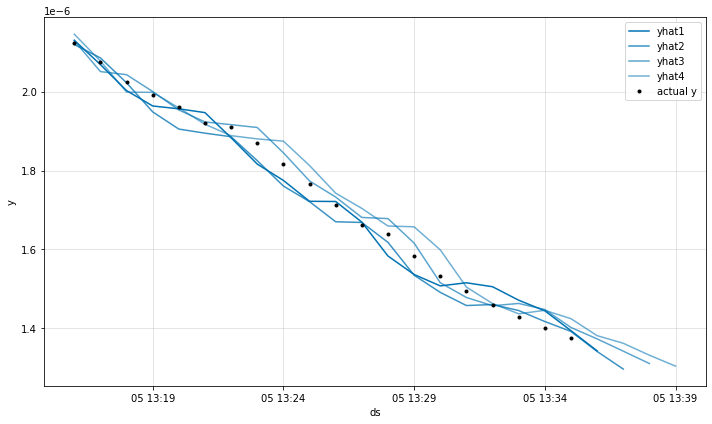

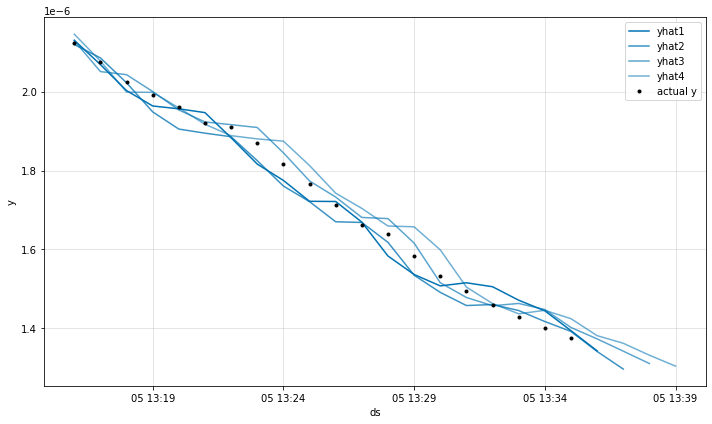

In [ ]:
foro=m.make_future_dataframe(df_train,periods=4,n_historic_predictions=True)
a=m.predict(foro)
m.plot(a[-24:])

INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.89% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min
INFO - (NP.df_utils._infer_frequency) - Major frequency T corresponds to 99.89% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 1min


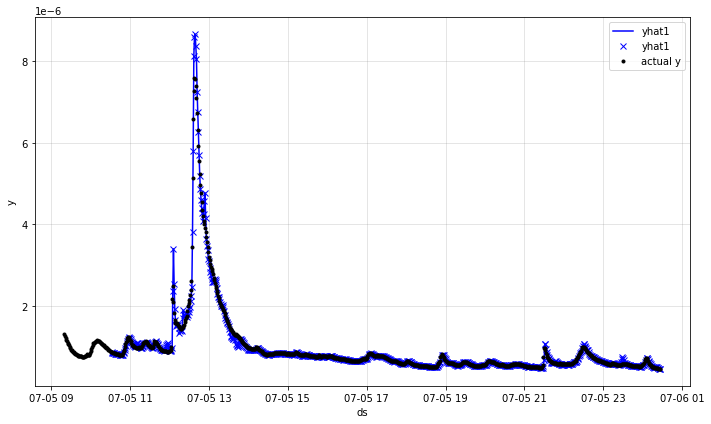

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)